# LinUCB Hybrid

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


# Data Preprocessing

In [2]:
from sklearn.preprocessing import OneHotEncoder

## User data 

In [3]:
user = pd.read_csv("../data/ml-100k/u.user", header=None, sep="|")
user.columns = ["user_id", "age", "gender", "occupation", "zipcode"]
user = user.drop(["zipcode"], axis=1)

In [4]:
bins = [0, 20, 30, 40, 50, 60, np.inf]
names = ['<20', '20-29', '30-39', '40-49', '51-60', '60+']

user['agegroup'] = pd.cut(user['age'], bins, labels=names)
user = user.drop(["age"], axis=1)
user.head()

,user_id,gender,occupation,agegroup
0,1,M,technician,20-29
1,2,F,other,51-60
2,3,M,writer,20-29
3,4,M,technician,20-29
4,5,F,other,30-39


In [5]:
columnsToEncode = ["agegroup", "gender", "occupation"]
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
myEncoder.fit(user[columnsToEncode])  # Fitting the encoder

user_features = pd.concat([
    user.drop(columns=columnsToEncode, axis=1),
    pd.DataFrame(myEncoder.transform(user[columnsToEncode]), columns=myEncoder.get_feature_names(columnsToEncode))
], axis=1)

/Users/sabrina/opt/anaconda3/envs/TF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
user_features.head()

,user_id,agegroup_20-29,agegroup_30-39,agegroup_40-49,agegroup_51-60,agegroup_60+,agegroup_<20,gender_F,gender_M,occupation_administrator,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Movie Data (Arm)

In [7]:
movie = pd.read_csv("../data/ml-100k/u.item", header = None, sep = "|", encoding='latin-1')
movie.columns = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", 
                  "unknown", "Action", "Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy",
                  "Film-Noir","Horror", "Musical", "Mystery","Romance","Sci-Fi","Thriller", "War","Western"]

In [8]:
movie_features = movie.drop(["movie_title","release_date", "video_release_date", "IMDb_URL"],axis = 1)
movie_features

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Stream data of users with movie ratings & reward

In [9]:
data = pd.read_csv("../data/ml-100k/u.data", sep ="\t", header=None, names = ["user_id", "movie_id","rating", "timestamp"])
data = data.drop(["timestamp"], axis = 1)

In [10]:
n = 30

# Find total number of ratings instances for top n movies
data.groupby("movie_id").count().sort_values("user_id", ascending = False).head(n)["rating"].sum()

11995

In [11]:
# Obtain top movies index
top_movies_index = data.groupby("movie_id").count().sort_values("user_id", ascending = False).head(n).reset_index()["movie_id"]

In [12]:
top_movies_features = movie_features[movie_features.movie_id.isin(top_movies_index)]

In [13]:
top_movies_features.to_numpy().shape

(30, 20)

In [14]:
filtered_data_original = data[data["movie_id"].isin(top_movies_index)]

filtered_data_original.head()

,user_id,movie_id,rating
12,200,222,5
24,308,1,4
31,301,98,4
50,251,100,4
53,25,181,5


In [15]:
filtered_data_original["reward"] = np.where(filtered_data_original["rating"] <5,0,1)

filtered_data_original = filtered_data_original.reset_index(drop = True)

/var/folders/kr/tj38xj016kj1tv_vzkg2sb4r0000gn/T/ipykernel_6439/1568349636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_original["reward"] = np.where(filtered_data_original["rating"] <5,0,1)


In [16]:
filtered_data_original.head()

,user_id,movie_id,rating,reward
0,200,222,5,1
1,308,1,4,0
2,301,98,4,0
3,251,100,4,0
4,25,181,5,1


<AxesSubplot: >

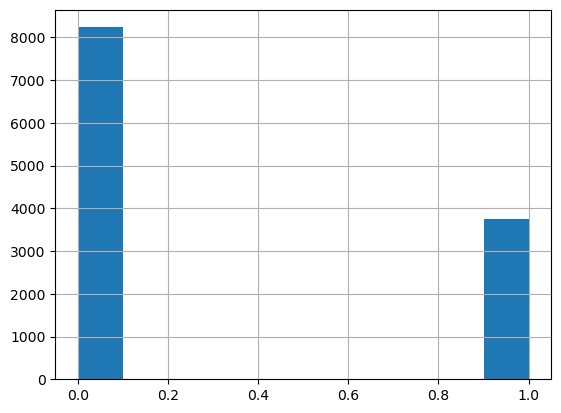

In [17]:
filtered_data_original.reward.hist()

In [18]:
reward_mean = filtered_data_original.reward.mean()
reward_mean

0.3134639433097124

In [19]:
# Reshuffling rows to randomise it
np.random.seed(100)
filtered_data = filtered_data_original.reindex(np.random.permutation(filtered_data_original.index)).reset_index(drop = True)

## LinUCB Disjoint Simulation

In [20]:
# Create class object for a single linear ucb disjoint arm
class linucb_disjoint_arm():
    
    def __init__(self, arm_index, d, alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x_array) +  self.alpha * np.sqrt(np.dot(x_array.T, np.dot(A_inv,x_array)))
        
        return p
    
    def reward_update(self, reward, x_array):
        # Update A which is (d * d) matrix.
        self.A += np.dot(x_array, x_array.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x_array

In [21]:
class linucb_disjoint_policy():
    
    def __init__(self, K_arms, d, alpha):
        self.K_arms = K_arms
        self.linucb_arms = [linucb_disjoint_arm(arm_index = i, d = d, alpha = alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm
    
    def store_arm_index(self, arms_index_array):
    # Arms_features_array is multidimension array of shape (K_arms, 1+arm_dimensions), where 1 is for arm_index

        # Loop through all arms to store the individual arms
        for i in range(self.K_arms):

            self.linucb_arms[i].arm_index = arms_index_array[i]

In [22]:
def ctr_disjoint_simulator(K_arms, d, alpha, epochs, top_movies_index, steps_printout):
    start_time = time.time()
    # Initiate policy
    linucb_disjoint_policy_object = linucb_disjoint_policy(K_arms = K_arms, d = d, alpha = alpha)
    
    # Store specific arm_index
    linucb_disjoint_policy_object.store_arm_index(top_movies_index.to_numpy())
    
    # Instantiate trackers
    runtime =0
    aligned_time_steps = 0
    cumulative_rewards = 0
    aligned_ctr = []
    unaligned_ctr = [] # for unaligned time steps
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))
        
        if epoch_iter == 0:
            # Start with filtered data first
            data = filtered_data.copy()
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        else:
            
            # Recycle unused data
            data = unused_data.copy().reset_index(drop = True)
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        
        for i in range(len(data)):

            user_id = data.loc[i,"user_id"]
            movie_id = data.loc[i, "movie_id"]

            # x_array: User features
            data_x_array = np.array(user_features.query("user_id == @user_id").drop("user_id", axis = 1)) # Shape (1 * 29), d = 29
            data_x_array = data_x_array.reshape(29,1)

            # Obtain rewards
            data_reward = data.loc[i, "reward"]

            if i%steps_printout == 0:
                print("step "+str(i))

            # Find policy's chosen arm based on input covariates at current time step
            chosen_arm_index = linucb_disjoint_policy_object.select_arm(data_x_array)

            # Check if arm_index is the same as data_arm (ie same actions were chosen)
            # Note that data_arms index range from 1 to 10 while policy arms index range from 0 to 9.
            if linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].arm_index  == movie_id:

                # Use reward information for the chosen arm to update
                linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].reward_update(data_reward, data_x_array)
                
                # For CTR calculation
                aligned_time_steps += 1
                cumulative_rewards += data_reward
                aligned_ctr.append(cumulative_rewards/aligned_time_steps)
            
            else:
                # Recycle data
                unused_data = pd.concat([unused_data, data.iloc[i:i+1]], ignore_index=True)
                    
    end_time = time.time()
    runtime = end_time - start_time
    print(runtime)
    return {"aligned_time_steps": aligned_time_steps, 
            "cumulative_rewards": cumulative_rewards, 
            "aligned_ctr":aligned_ctr, 
            "policy":linucb_disjoint_policy_object,
            "runtime": runtime}

# LinUCB Disjoint dynamic α Simulation

In [23]:
class linucb_disjoint_adjust_alpha_arm():
    
    def __init__(self, arm_index, d, initial_alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = initial_alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x_array) +  self.alpha * np.sqrt(np.dot(x_array.T, np.dot(A_inv,x_array)))
        
        return p
    
    def reward_update(self, reward, x_array):
        # Update A which is (d * d) matrix.
        self.A += np.dot(x_array, x_array.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x_array


In [24]:
class linucb_disjoint_adjust_alpha_policy():
    
    def __init__(self, K_arms, d, initial_alpha):
        self.K_arms = K_arms
        self.initial_alpha = initial_alpha
        self.linucb_arms = [linucb_disjoint_adjust_alpha_arm(arm_index = i, d = d, initial_alpha = initial_alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm
    
    def store_arm_index(self, arms_index_array):
    # Arms_features_array is multidimension array of shape (K_arms, 1+arm_dimensions), where 1 is for arm_index

        # Loop through all arms to store the individual arms
        for i in range(self.K_arms):

            self.linucb_arms[i].arm_index = arms_index_array[i]

In [25]:
def linucb_disjoint_adjust_alpha_simulator(K_arms, d, initial_alpha, epochs, top_movies_index, steps_printout, evaluation_interval):
    start_time = time.time()
    # Initiate policy
    linucb_disjoint_policy_object = linucb_disjoint_adjust_alpha_policy(K_arms=K_arms, d=d, initial_alpha=initial_alpha)
    
    # Store specific arm_index
    linucb_disjoint_policy_object.store_arm_index(top_movies_index.to_numpy())
    
    # Instantiate trackers
    aligned_time_steps = 0
    cumulative_rewards = 0
    runtime = 0
    aligned_ctr = []
    alpha_history = [initial_alpha]
    previous_ctr = 0  # Initialize previous CTR for comparison
    
    for epoch_iter in range(epochs):
        print("Epoch:", epoch_iter)
        #print(alpha_history)
        
        if epoch_iter == 0:
            # Start with filtered data first
            data = filtered_data.copy()
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns=["user_id", "movie_id", "rating", "reward"])
        else:
            # Recycle unused data
            data = unused_data.copy().reset_index(drop=True)
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns=["user_id", "movie_id", "rating", "reward"])
        
        for i in range(len(data)):
            user_id = data.loc[i, "user_id"]
            movie_id = data.loc[i, "movie_id"]

            # x_array: User features
            data_x_array = np.array(user_features.query("user_id == @user_id").drop("user_id", axis=1))
            data_x_array = data_x_array.reshape(d, 1)

            # Obtain rewards
            data_reward = data.loc[i, "reward"]

            if i % steps_printout == 0:
                print("Step:", i)

            # Find policy's chosen arm based on input covariates at current time step
            chosen_arm_index = linucb_disjoint_policy_object.select_arm(data_x_array)

            # Check if arm_index is the same as data_arm
            if linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].arm_index == movie_id:
                # Use reward information for the chosen arm to update
                linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].reward_update(data_reward, data_x_array)

                # For CTR calculation
                aligned_time_steps += 1
                cumulative_rewards += data_reward
                aligned_ctr.append(cumulative_rewards / aligned_time_steps)
            else:
                # Recycle data
                unused_data = pd.concat([unused_data, data.iloc[i:i+1]], ignore_index=True)
        
            # Adjust alpha after each data point processed
            if i % evaluation_interval == 0:
                # Calculate current CTR
                if aligned_time_steps > 0:
                    current_ctr = cumulative_rewards / aligned_time_steps
                else:
                    current_ctr = 0  # Handle the case where no data points are aligned

                #print(f"Evaluating alpha adjustment: current CTR={current_ctr}, previous CTR={previous_ctr}")

                # Update alpha based on performance evaluation
                if current_ctr > previous_ctr:
                    # If current performance is improving, decrease alpha，reduce exploration
                    new_alpha = max(0.05, alpha_history[-1] *0.95)
                elif current_ctr < previous_ctr:
                    # If current performance is not improving, increase alpha slightly，increase exploration
                    new_alpha = min(2.5, alpha_history[-1] *1.05)
                    
                else:
                    # If current performance is stable, keep alpha the same
                    new_alpha = alpha_history[-1]

                # Update alpha in the policy object
                for arm in linucb_disjoint_policy_object.linucb_arms:
                    arm.alpha = new_alpha
                
                # Append new alpha to history
                alpha_history.append(new_alpha)
                #print("Updated alpha:", new_alpha)
                #print("alpha_history:", alpha_history)
                
                # Update previous CTR
                previous_ctr = current_ctr
                
    end_time = time.time()
    runtime = end_time - start_time
    print(runtime)                
    return {
        "aligned_time_steps": aligned_time_steps, 
        "cumulative_rewards": cumulative_rewards, 
        "aligned_ctr": aligned_ctr,
        "alpha_history": alpha_history,
        "policy": linucb_disjoint_policy_object,
        "runtime": runtime
    }

In [26]:
# Plot aligned_ctr and alpha_history on the same y-axis
def plot_ctr_alpha_history(aligned_ctr, alpha_history, reward_mean, initial_alpha, title):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot aligned CTR
    ax.axhline(reward_mean, label="Reward Mean", color="violet")
    ax.plot(aligned_ctr, label="CTR of Dynamic Alpha", color='blue')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('CTR and Alpha', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Plot alpha history
    alpha_points = len(alpha_history)
    max_index = len(aligned_ctr)
    interp_indices = np.linspace(0, max_index - 1, alpha_points).astype(int)
    ax.plot(interp_indices, alpha_history, label="Alpha History", color='red', linestyle='dashed')

    # Add scatter points and annotations to alpha history
    for i, alpha in enumerate(alpha_history):
        interval_index = interp_indices[i]
        y_value = alpha_history[i]
        ax.scatter(interval_index, y_value, color='red')  # Add scatter point
        ax.annotate(f'{alpha:.3f}', (interval_index, y_value),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    fig.tight_layout()
    fig.suptitle(f"{title}: Aligned CTR and Alpha History - initial α = {initial_alpha:.2f}", y=1.05)
    plt.legend()
    plt.show()
    

In [27]:
# Plot aligned_ctr and alpha_history on the same y-axis
def plot_compare_fixed_dynamic_alpha(aligned_ctr, alpha_history, reward_mean, initial_alpha, title, fix_alpha_simulation_results):
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plot aligned CTR
    ax.axhline(reward_mean, label="Reward Mean", color="violet")
    ax.axhline(initial_alpha, label=f'LinUCB Disjoint α={initial_alpha}', color="orange")
    ax.plot(fix_alpha_simulation_results["aligned_ctr"], label="CTR of LinUCB Disjoint", color='green')
    ax.plot(aligned_ctr, label="CTR of Dynamic Alpha", color='blue')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('CTR and Alpha', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Plot alpha history
    alpha_points = len(alpha_history)
    max_index = len(aligned_ctr)
    interp_indices = np.linspace(0, max_index - 1, alpha_points).astype(int)
    ax.plot(interp_indices, alpha_history, label="Alpha History", color='red', linestyle='dashed')

    # Add scatter points and annotations to alpha history
    for i, alpha in enumerate(alpha_history):
        interval_index = interp_indices[i]
        y_value = alpha_history[i]
        ax.scatter(interval_index, y_value, color='red')  # Add scatter point
        ax.annotate(f'{alpha:.3f}', (interval_index, y_value),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    fig.tight_layout()
    fig.suptitle(f"{title}: Aligned CTR and Alpha History - initial α = {initial_alpha:.2f}", y=1.05)
    plt.legend()
    plt.show()
    

In [39]:
def multi_run_simulation(alpha, K_arms, d, epochs, top_movies_index, filtered_data_original, steps_printout=5000, evaluation_interval=1000):
    disjoint_ctr = []
    disjoint_ctr_adjust_alpha = []
    alpha_history_list = []
    runtimes_fixed_alpha = []
    runtimes_adjust_alpha = []
    
    # Run the simulation 10 times
    for i in range(50):
        # Shuffling data order based on random seed
        np.random.seed(i)
        filtered_data = filtered_data_original.reindex(np.random.permutation(filtered_data_original.index)).reset_index(drop=True)
        
        # disjoint_ctr_adjust_alpha policy
        simulation_disjoint_adjust_alpha = linucb_disjoint_adjust_alpha_simulator(K_arms=n, 
                                                                                  d=d,
                                                                                  initial_alpha=alpha, 
                                                                                  epochs=epochs, 
                                                                                  top_movies_index=top_movies_index, 
                                                                                  steps_printout=steps_printout,
                                                                                  evaluation_interval=evaluation_interval)
        
        disjoint_ctr_adjust_alpha.append(simulation_disjoint_adjust_alpha["aligned_ctr"])
        alpha_history_list.append(simulation_disjoint_adjust_alpha["alpha_history"])
        # Assuming simulation_disjoint_adjust_alpha is populated from a function, check if 'runtime' is in the dictionary
        if 'runtime' in simulation_disjoint_adjust_alpha:
            runtimes_adjust_alpha.append(simulation_disjoint_adjust_alpha['runtime'])
        else:
            # Handle the case where 'runtime' is not available
            print("Runtime data is missing from the simulation results.")
            runtimes_adjust_alpha.append(None)  # Or handle appropriately, maybe with a default value or a specific error handling routine
        
        # Disjoint policy
        simulation_disjoint_alpha = ctr_disjoint_simulator(K_arms=n, 
                                                           d=d,
                                                           alpha=alpha, 
                                                           epochs=epochs, 
                                                           top_movies_index=top_movies_index, 
                                                           steps_printout=steps_printout)
        disjoint_ctr.append(simulation_disjoint_alpha["aligned_ctr"])
        runtimes_fixed_alpha.append(simulation_disjoint_alpha["runtime"])

    # Find min time step
    min_len = 5000

    # Determine the minimum length of time steps
    for i in range(50):
        if len(disjoint_ctr_adjust_alpha[i]) < min_len or len(disjoint_ctr[i]) < min_len:
            min_len = min(len(disjoint_ctr_adjust_alpha[i]), len(disjoint_ctr[i]))

    # Initiate list for storing shortened ctr based on the min time steps
    shorten_disjoint_ctr_adjust_alpha = []
    shorten_disjoint_ctr = []

    for i in range(50):
        # Shortening all ctr to common time steps
        shorten_disjoint_ctr_adjust_alpha.append(disjoint_ctr_adjust_alpha[i][:min_len])
        shorten_disjoint_ctr.append(disjoint_ctr[i][:min_len])

    # Calculate the average CTRs
    avg_disjoint_ctr_adjust_alpha = np.array(shorten_disjoint_ctr_adjust_alpha).mean(axis=0)
    avg_disjoint_ctr = np.array(shorten_disjoint_ctr).mean(axis=0)

    # Calculate the average alpha history
    alpha_history_lengths = [len(history) for history in alpha_history_list]
    max_alpha_history_length = max(alpha_history_lengths)
    avg_alpha_history = np.zeros(max_alpha_history_length)
    count_alpha_history = np.zeros(max_alpha_history_length)

    for history in alpha_history_list:
        for j, alpha in enumerate(history):
            avg_alpha_history[j] += alpha
            count_alpha_history[j] += 1

    avg_alpha_history = avg_alpha_history / count_alpha_history
    runtimes_fixed_alpha_all = sum(runtimes_fixed_alpha)
    runtimes_adjust_alpha_all = sum(runtimes_adjust_alpha)

    return {
        "avg_disjoint_ctr_adjust_alpha": avg_disjoint_ctr_adjust_alpha,
        "avg_disjoint_ctr": avg_disjoint_ctr,
        "avg_alpha_history": avg_alpha_history,
        "runtimes_fixed_alpha_all": runtimes_fixed_alpha_all,
        "runtimes_adjust_alpha_all": runtimes_adjust_alpha_all
    }



In [40]:
results_025_10 = run_simulation(alpha=0.25, 
                         K_arms=n, 
                         d=29, 
                         epochs=2, 
                         top_movies_index=top_movies_index, 
                         filtered_data_original=pd.DataFrame())



Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
83.4621000289917
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
80.08622598648071
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
83.75890707969666
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
98.85784816741943
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
84.3025450706482
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
80.15353488922119
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
82.66076874732971
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
78.50506401062012
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
83.94191288948059
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
97.64579892158508
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Ste

Epoch: 1
Step: 0
Step: 5000
Step: 10000
90.19506192207336
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
96.95112705230713
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
102.81460905075073
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
83.84008884429932
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
88.84943985939026
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
84.6872398853302
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
86.43352484703064
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
85.59804105758667
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
90.88757085800171
Epoch: 0
step 0
step 5000
step 10000
Epoch: 1
step 0
step 5000
step 10000
88.8552622795105
Epoch: 0
Step: 0
Step: 5000
Step: 10000
Epoch: 1
Step: 0
Step: 5000
Step: 10000
85.29908514

In [45]:
print("All CTR 50 times run fixed alpha = 0.25: ")
print(results_025_10["avg_disjoint_ctr"])

print("All CTR 50 times run dyniamic alpha")
print(results_025_10["avg_disjoint_ctr_adjust_alpha"])

All CTR 50 times run fixed alpha = 0.25: 
[0.34       0.4        0.4        0.4        0.392      0.39666667
 0.42285714 0.43       0.42666667 0.43       0.43818182 0.45
 0.45692308 0.46571429 0.46666667 0.465      0.46235294 0.46777778
 0.47368421 0.476      0.4752381  0.47636364 0.47652174 0.47666667
 0.476      0.47692308 0.47777778 0.47928571 0.47655172 0.472
 0.46903226 0.469375   0.46666667 0.46529412 0.46514286 0.46555556
 0.46216216 0.45947368 0.4574359  0.454      0.44926829 0.4447619
 0.44325581 0.44045455 0.43822222 0.43956522 0.44       0.43916667
 0.43918367 0.4392     0.43960784 0.44115385 0.44264151 0.44259259
 0.44254545 0.44464286 0.4445614  0.44551724 0.44440678 0.44333333
 0.44393443 0.44258065 0.4431746  0.4434375  0.44461538 0.44515152
 0.4441791  0.44352941 0.44376812 0.44342857 0.4428169  0.44277778
 0.44219178 0.44216216 0.44266667 0.44263158 0.44233766 0.44153846
 0.44177215 0.441      0.4417284  0.44146341 0.44120482 0.44166667
 0.44094118 0.43883721 0.44     

In [46]:

print("CTR 50 times run fixed alpha = 0.25: ",np.mean(results_025_10["avg_disjoint_ctr"]))
print("runtime:",results_025_10["runtimes_fixed_alpha_all"])

print("CTR 50 times run dyniamic",np.mean(results_025_10["avg_disjoint_ctr_adjust_alpha"]))
print("runtime:",results_025_10["runtimes_adjust_alpha_all"])

CTR 50 times run fixed alpha = 0.25:  0.44460775692990934
runtime: 4597.688304424286
CTR 50 times run dyniamic 0.4434970097864696
runtime: 4572.482020616531


In [42]:
def plot_simulation_results(avg_disjoint_ctr, avg_disjoint_ctr_adjust_alpha, avg_alpha_history, reward_mean, alpha_value, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    else:
        fig = ax.figure

    # Plot avg_disjoint_ctr with dynamic alpha value in the label
    ax.axhline(reward_mean, label="Reward Mean", color="violet")
    ax.plot(avg_disjoint_ctr, label=f'Disjoint CTR (alpha={alpha_value})', color='green')
    ax.plot(avg_disjoint_ctr_adjust_alpha, label='Disjoint CTR with Adjusted Alpha', color='blue')

    # Set labels and title
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('CTR and Alpha', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    # Plot alpha_history
    alpha_points = len(avg_alpha_history)
    max_index = len(avg_disjoint_ctr_adjust_alpha)
    interp_indices = np.linspace(0, max_index - 1, alpha_points).astype(int)
    ax.plot(interp_indices, avg_alpha_history, label='Alpha History', color='red', linestyle='dashed')

    # Add scatter points and annotations to alpha_history
    for i, alpha in enumerate(avg_alpha_history):
        interval_index = interp_indices[i]
        y_value = avg_alpha_history[i]
        ax.scatter(interval_index, y_value, color='red')  # Add scatter point
        ax.annotate(f'{alpha:.3f}', (interval_index, y_value), 
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    # Add legend and title
    ax.legend()
    fig.tight_layout()
    fig.suptitle("Comparison of Disjoint Policies with Fixed and Adjusted Alpha", y=1.05)
    plt.show()

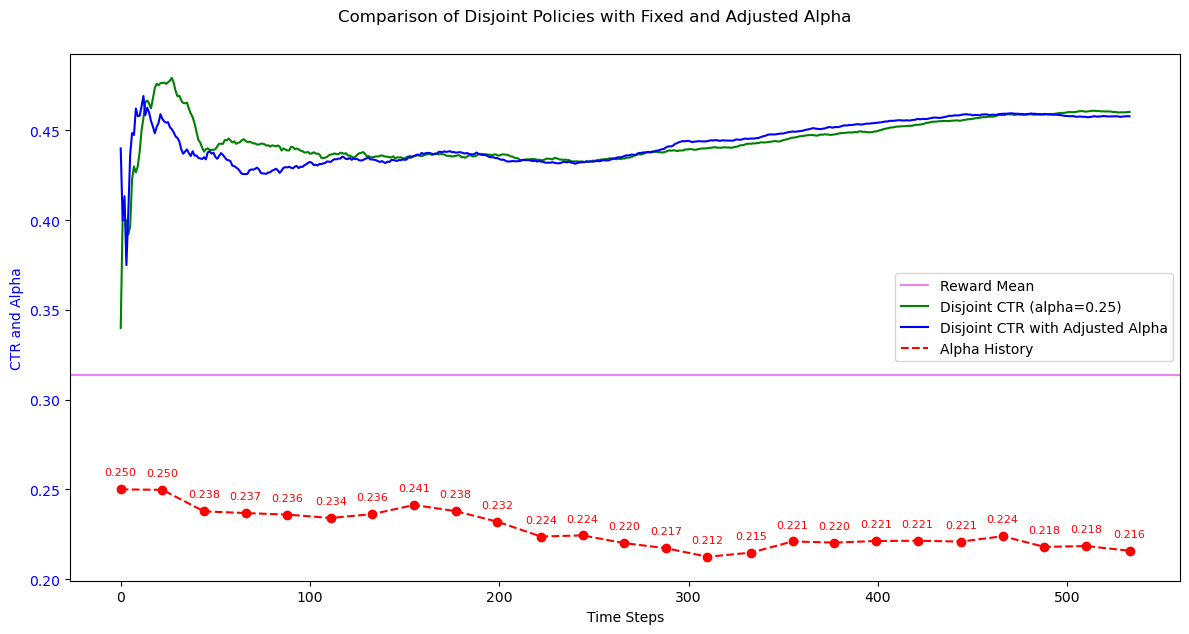

In [43]:
plot_simulation_results_025_10 = plot_simulation_results(avg_disjoint_ctr=results_025_10["avg_disjoint_ctr"], 
                                                         avg_disjoint_ctr_adjust_alpha=results_025_10["avg_disjoint_ctr_adjust_alpha"], 
                                                         avg_alpha_history=results_025_10["avg_alpha_history"],
                                                         reward_mean=reward_mean, 
                                                         alpha_value = 0.25)

